In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816],
                    [8.9], [5.2], [8.59], [2.1], [8], [10], [4.5],
                    [6], [4]],
                   dtype = np.float32)

y_train = np.array([[2.6], [1.6], [3.9], [2.4], [2.4], [3.357],
                    [2.6], [1.96], [3.53], [1.76], [3.2], [3.5],
                    [1.6], [2.5], [2.2]],
                   dtype = np.float32)

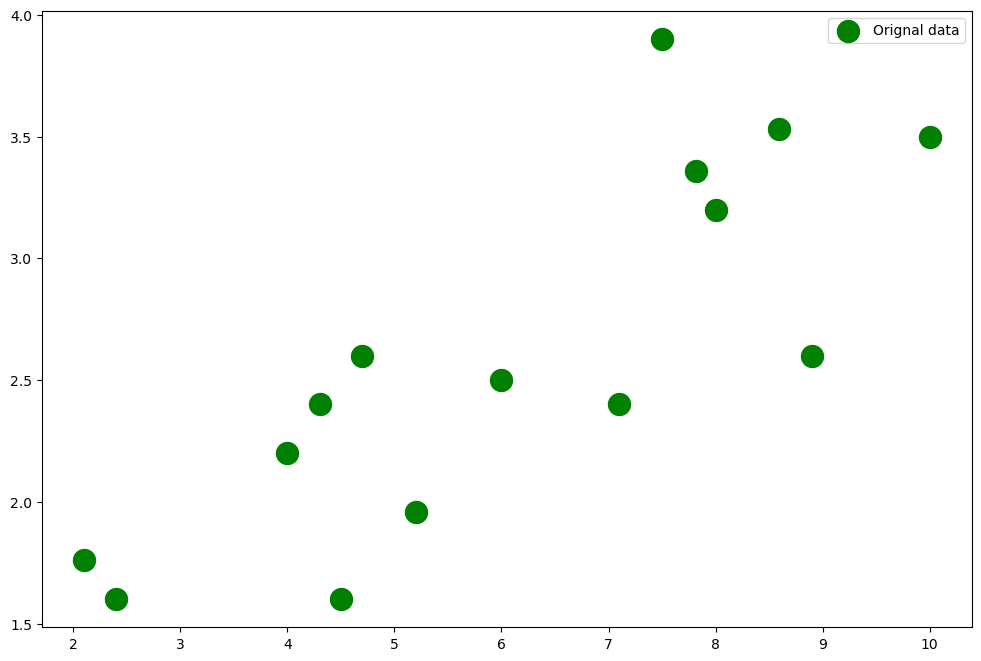

In [5]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, label='Orignal data', s=250, c='g')
plt.legend()
plt.show()

In [6]:
import torch

In [7]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

In [8]:
input_size = 1
hidden_size = 1
output_size = 1

In [9]:
# Need to turn on gradients for the weights as this is what we want to train
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [10]:
w2 = torch.rand(hidden_size, output_size, requires_grad=True)
w2.shape

torch.Size([1, 1])

In [11]:
learning_rate = 1e-6

In [30]:
for iter in range(1, 3000):
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()

    if iter % 50 == 0:
        print(iter, loss.item())
    
    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 5.826283931732178
100 5.7195329666137695
150 5.6251349449157715
200 5.541605472564697
250 5.467635154724121
300 5.402085781097412
350 5.343964576721191
400 5.292403221130371
450 5.246631145477295
500 5.205967903137207
550 5.169839859008789
600 5.137723922729492
650 5.109157562255859
700 5.083739280700684
750 5.061110019683838
800 5.0409650802612305
850 5.0230207443237305
900 5.007030963897705
950 4.99277925491333
1000 4.98007345199585
1050 4.968742370605469
1100 4.958633899688721
1150 4.949614524841309
1200 4.9415669441223145
1250 4.934382438659668
1300 4.927968978881836
1350 4.922239303588867
1400 4.9171247482299805
1450 4.9125542640686035
1500 4.908470630645752
1550 4.904821395874023
1600 4.901559829711914
1650 4.898645401000977
1700 4.896039962768555
1750 4.893710613250732
1800 4.891627788543701
1850 4.889764308929443
1900 4.888099193572998
1950 4.886608600616455
2000 4.885275363922119
2050 4.884082794189453
2100 4.883016109466553
2150 4.8820624351501465
2200 4.881207466125488
22

In [31]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[0.5343]], requires_grad=True)
w2:  tensor([[0.7629]], requires_grad=True)


In [32]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [33]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.9158],
        [0.9783],
        [3.0571],
        [2.8941],
        [1.7527],
        [3.1859],
        [3.6278],
        [2.1196],
        [3.5014],
        [0.8560],
        [3.2609],
        [4.0761],
        [1.8343],
        [2.4457],
        [1.6305]], grad_fn=<MmBackward0>)

In [34]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.9157898 ],
       [0.97827566],
       [3.0571115 ],
       [2.8940654 ],
       [1.752744  ],
       [3.1859176 ],
       [3.6277723 ],
       [2.1195972 ],
       [3.5014117 ],
       [0.8559911 ],
       [3.2609189 ],
       [4.0761485 ],
       [1.8342668 ],
       [2.445689  ],
       [1.6304594 ]], dtype=float32)

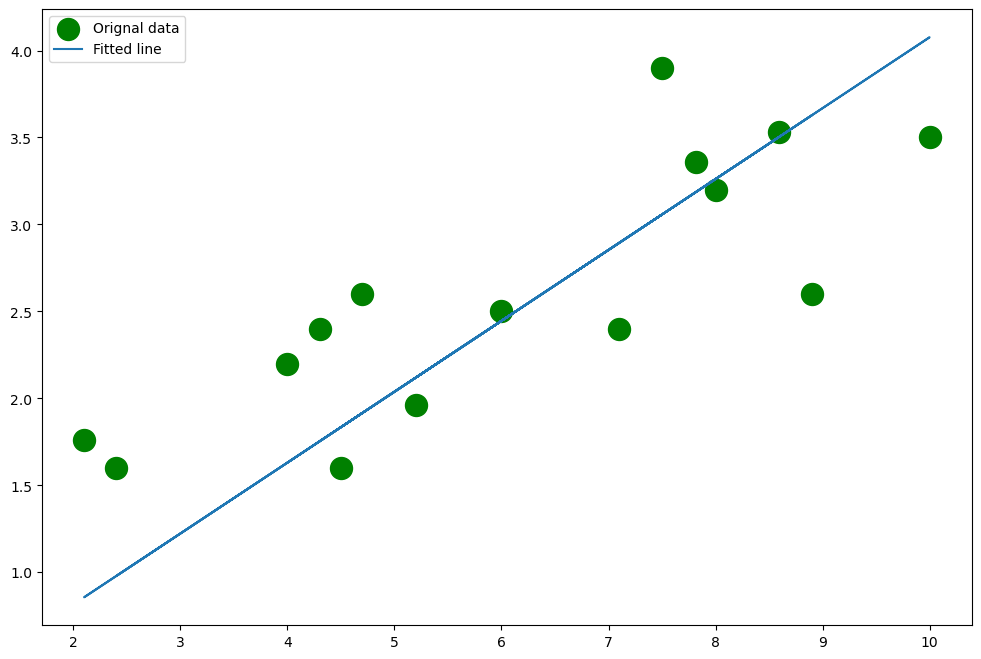

In [35]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, label='Orignal data', s=250, c='g')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()